In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy

## Comics and Gender Representation

This data was found on Kaggle and was scraped from the [Marvel Wikia](https://marvel.fandom.com/wiki/Marvel_Database) and [DC Wikia](https://dc.fandom.com/wiki/DC_Comics_Database) websites. It is a dataset about comic book characters including categorical variables such as gender, sexual orientation, and if they have a secret identity and quantitative variables such as the year the character was introduced and their total number of appearances. 

I used this dataset to study the gender representation of comic book characters by looking at representation over time, among the most popular, and the 'popularity' of the most popular.

In [3]:
#load the two data frames
marvel_df = pd.read_csv('capstone_data/marvel-wikia-data.csv')
dc_df = pd.read_csv('capstone_data/dc-wikia-data.csv')

#convert marvel_df 'Year' to match dc_df 'YEAR' so the merge works correctly
marvel_df.rename(columns={'Year' : 'YEAR'}, inplace=True)

#Combine both dfs and confirm they merged correctly
df = pd.concat([marvel_df, dc_df], sort=False).reset_index()
df.head()

,index,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


__Let's inspect the data and see what we can find.__

In [4]:
df.describe()

,index,page_id,APPEARANCES,YEAR
count,23272.000000,23272.000000,21821.000000,22388.000000
mean,6782.934857,254956.821932,19.009303,1986.420046
std,4646.041791,231417.093079,93.814040,18.972698
min,0.000000,1025.000000,1.000000,1935.000000
25%,2908.750000,31385.750000,1.000000,1976.000000
50%,5817.500000,192263.500000,4.000000,1990.000000
75%,10557.250000,456337.750000,10.000000,2001.000000
max,16375.000000,755278.000000,4043.000000,2013.000000


In [5]:
df.SEX.value_counts()

Male Characters           16421
Female Characters          5804
Agender Characters           45
Genderless Characters        20
Genderfluid Characters        2
Transgender Characters        1
Name: SEX, dtype: int64

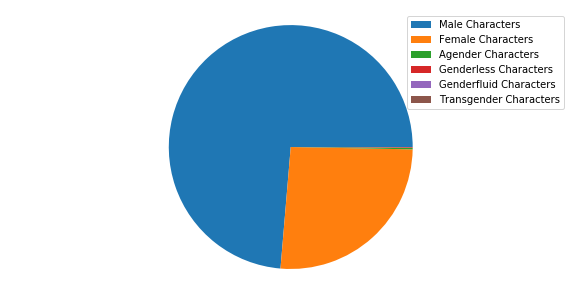

In [6]:
#Create a pie chart by gender
gender_percents = df.SEX.value_counts()
plt.figure(figsize=(10, 5))
plt.pie(gender_percents)
plt.axis('equal')
plt.legend(gender_percents.index)
plt.show()

__A few immediate noticings:__

1) It looks like half of new characters had their first appearance between 1990-2013.

2) Only the top 25% of characters have more than 10 appearances, and the number of appearances is quite varied. It could be worthwhile to look at only the most popular characters.

3) It looks like nearly 75% of all characters are male. The rest appear to be female; we wouldn't even know there were other groups represented in the pie chart without the legend or the percents!

Let's take a deeper look into these noticings.

### 1. How many new characters have been released every year in the overall data? Does this trend continue if split by gender? What if we were looked a the proportion of male to female for each year?

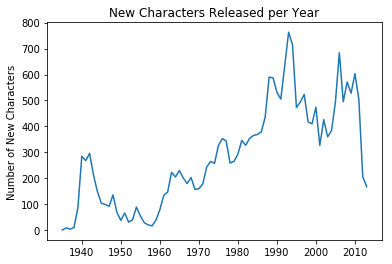

In [7]:
#create an analysis of all new characters by year
new_characters_per_year = df.YEAR.value_counts().sort_index()
#make a line chart by year
plt.plot(new_characters_per_year)
plt.title('New Characters Released per Year')
plt.ylabel('Number of New Characters')
plt.show()

There is definitely a gradual trend upwards from the 1960's to the 1990's with a good amount of volatility in the years after. How does this look if we were to seperate the data by gender? 

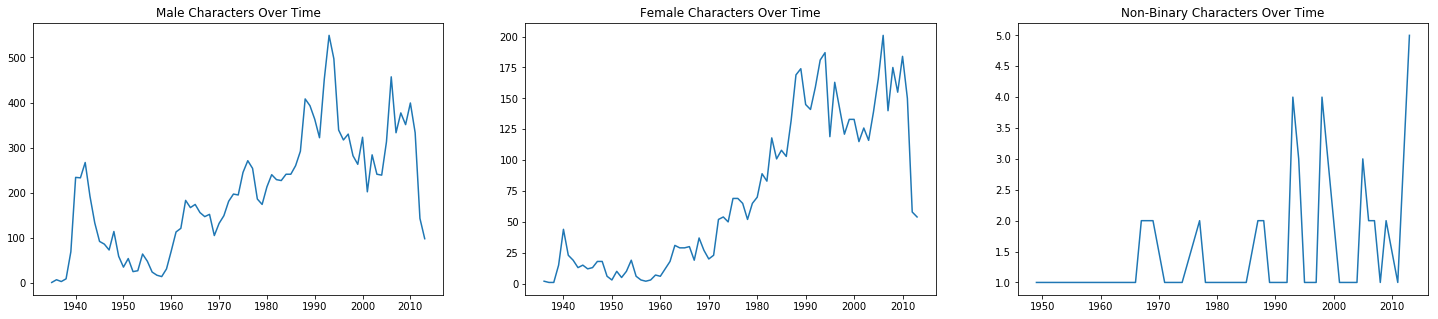

In [8]:
#split the data by their group
female_characters = df.loc[df.SEX == 'Female Characters']
male_characters = df.loc[df.SEX == 'Male Characters']
#Note that the last boolean in this call will remove any NaN values
non_binary_characters = df.loc[(df.SEX != 'Male Characters') & (df.SEX != 'Female Characters') & df.SEX]

#plot all three side by side
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plt.plot(male_characters.YEAR.value_counts().sort_index())
plt.title('Male Characters Over Time')

plt.subplot(1, 3, 2)
plt.plot(female_characters.YEAR.value_counts().sort_index())
plt.title('Female Characters Over Time')

plt.subplot(1, 3, 3)
plt.plot(non_binary_characters.YEAR.value_counts().sort_index())
plt.title('Non-Binary Characters Over Time')
plt.show()

It seems that the male and female characters follow the overall trend of character releases (albeit substantially more male characters) while most non-binary characters seem to have debuted in the last 30 years.

The emergence of non-binary characters in the last 30 years could reflect how our society's views have changed during this time. For example, take this [study](https://www.pewforum.org/fact-sheet/changing-attitudes-on-gay-marriage/) conducted by the Pew Research Center about changing attitudes on same-sex marriage.

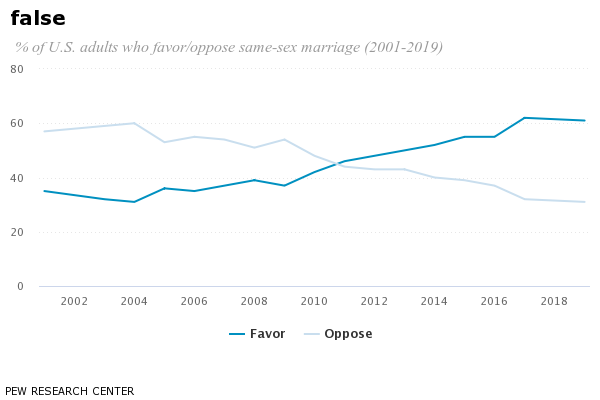

In [9]:
from IPython.display import Image
Image(filename='capstone_data\Pew_Chart.png')

As the graph shows, same-sex marriage has become more favorable in the public opinion since 2002. This sentiment could help explain the non-binary character emergence in the last 30 years.

Now let's look at the proportion of new characters split by gender for each year. 

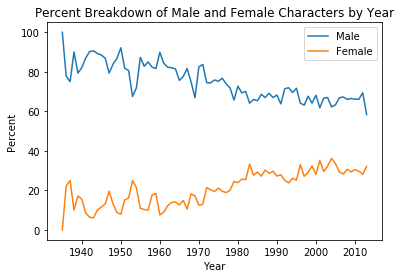

In [10]:
#create a male character percent by year
male_character_percent = male_characters.YEAR.value_counts().sort_index() / new_characters_per_year * 100

#create a female character percent by year
female_character_percent = female_characters.YEAR.value_counts().sort_index() / new_characters_per_year * 100
#turn NAN's into 0.00
female_character_percent.fillna(0, inplace=True)

#create our chart
plt.plot(male_character_percent, label='Male')
plt.plot(female_character_percent, label='Female')

plt.title('Percent Breakdown of Male and Female Characters by Year')
plt.ylabel('Percent')
plt.xlabel('Year')
plt.legend()

plt.show()

There has never been a year where more female characters were introduced than male, which isn't surprising given the overall dataset.

What's interesting is that the two lines seem to have a consistent trend towards one another! Maybe soon more new female characters will be introduced than male characters?

Now that we've had a look at trends overtime, I wonder what the gender representation is for only the most popular characters.

### 2. What is the gender representation among the most popular characters? Are they mostly men or is it more evenly representative?

We know there are many more male characters overall, but what if we only looked at the characters who have the most appearances? Let's look at the top twenty.

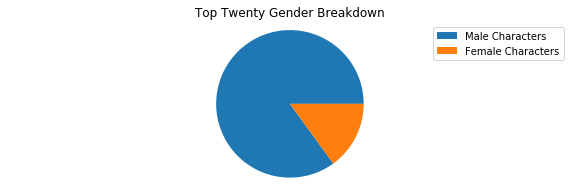

In [11]:
#let's create a df of the top twenty-five percent 
most_popular = df.loc[df.APPEARANCES >= 10].sort_index()

#Let's take a look at the top twenty overall
top_twenty = most_popular[:20]

plt.figure(figsize=(10, 3))

plt.pie(top_twenty.SEX.value_counts())
plt.axis('equal')
plt.legend(top_twenty.SEX.value_counts().index, loc="upper right")
plt.title('Top Twenty Gender Breakdown')

plt.show()


There is an even greater gap between the number of men and women within the top twenty than there is of our overall dataset and not a single non-binary character. I wonder who the top-twenty really are and where the females fall within that set?

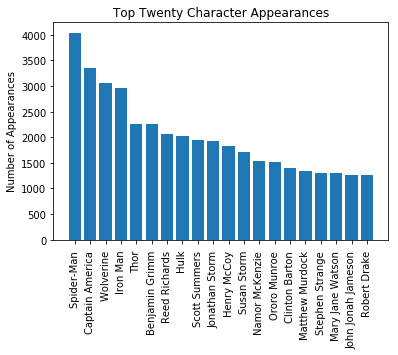

In [12]:
#Let's only use the first name in the set for plotting purposes
names = top_twenty.name.str.split('(').tolist()
names = [pair[0] for pair in names]

#create bar chart
plt.bar(names, top_twenty.APPEARANCES)
plt.xticks(rotation='vertical')
plt.title('Top Twenty Character Appearances')
plt.ylabel('Number of Appearances')
plt.show()

It looks like the most popular woman is twelth overall (Susan Storm) and there are only 3 total within the top twenty.

## 3. What about the popularity among the most popular? Does this affect gender representation?

What makes something 'popular' is a tough question to define. Let's make an attempt by creating a new variable that shows how frequently a character is written about each year since first being introduced. The more popular characters should be written about more frequently.

Unfortunately, you can only create an accurate calculation on characters who are still alive. They wouldn't continue writing for characters who are dead, right? Currently there is no stamp on the year that characters died or the year they last appeared, so we can't accurately know the number of years all characters were alive.

In [13]:
#create a new df based on the characters who are alive
living_characters = df.loc[df.ALIVE == 'Living Characters'] 
#create a new column for these characters that calculates their number of appearances per year
living_characters['appearances_per_year'] = living_characters['APPEARANCES'] / (2019 - living_characters['YEAR'])

living_characters.describe()

#living_characters.loc[:, 'appearances_per_year'] = living_characters.loc[:, 'APPEARANCES'] / (2019 - living_characters.loc[:, 'YEAR'])
#mask = (df.ALIVE == 'Living')
#df.loc[:, 'alive'] = 0
#df.loc[mask, 'alive'] = 1


c:\users\p-money's pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,index,page_id,APPEARANCES,YEAR,appearances_per_year
count,17808.000000,17808.000000,16602.000000,17059.000000,16050.000000
mean,6868.365454,257366.197552,20.280328,1986.915822,0.619372
std,4667.600551,231908.238114,104.485563,18.317434,2.189698
min,0.000000,1025.000000,1.000000,1935.000000,0.012048
25%,2996.000000,34099.000000,1.000000,1977.000000,0.058824
50%,5907.000000,193967.500000,4.000000,1991.000000,0.153846
75%,10617.250000,458813.000000,10.000000,2001.000000,0.433108
max,16375.000000,755278.000000,4043.000000,2013.000000,75.636364


This still seems to be skewed towards the most popular. Let's look at only the most popular, say the top twenty-five percent?

In [14]:
#choosing only the most popular characters
popular_characters = living_characters.loc[living_characters.APPEARANCES >= 10]
popular_characters.describe()

,index,page_id,APPEARANCES,YEAR,appearances_per_year
count,4294.000000,4294.000000,4294.000000,4249.000000,4249.000000
mean,1472.647881,110478.493479,69.629483,1983.454931,1.927637
std,902.325755,162934.219439,197.272074,17.630677,3.964181
min,0.000000,1025.000000,10.000000,1935.000000,0.126582
25%,707.250000,4851.250000,14.000000,1972.000000,0.448276
50%,1440.500000,27344.500000,22.000000,1986.000000,0.827586
75%,2158.000000,139873.500000,47.000000,1996.000000,1.703704
max,3341.000000,745756.000000,4043.000000,2013.000000,75.636364


This looks like a better representation. What are the gender representations of just these characters?

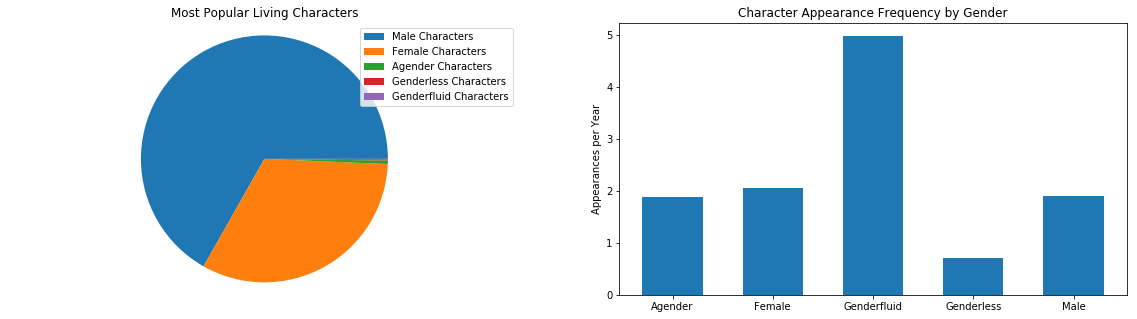

In [15]:
plt.figure(figsize=(20, 5))

#create a pie chart of the proportion of male/female characters
popular_gender = popular_characters.SEX.value_counts()
plt.subplot(1, 2, 1)
plt.pie(popular_gender)
plt.axis('equal')
plt.legend(popular_gender.index)
plt.title('Most Popular Living Characters')

#create a bar chart of the appearances per year by gender
plt.subplot(1, 2, 2)

#only using the gender type and dropping the word 'Characters'
popular_names = popular_characters.groupby('SEX')['appearances_per_year'].describe().index.str.split(' ')
popular_names = [pair[0] for pair in popular_names]
#create the chart
plt.bar(popular_names, popular_characters.groupby('SEX')['appearances_per_year'].mean(), width=0.6)
plt.title('Character Appearance Frequency by Gender')
plt.ylabel('Appearances per Year')

plt.show()

In [16]:
popular_characters.columns

Index(['index', 'page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR',
       'SEX', 'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR',
       'appearances_per_year'],
      dtype='object')

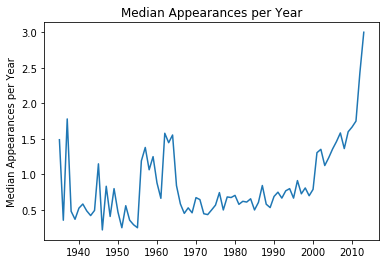

In [24]:
median_year = popular_characters.groupby('YEAR').appearances_per_year.median()

plt.plot(median_year)
plt.title('Median Appearances per Year')
plt.ylabel('Median Appearances per Year')

plt.show()

It's still mostly male characters, but it's more representative of women and non-binary characters.

It seems like non-binary characters are written about the most frequently, but this could be skewed based upon their emergence in only the last 30 years and that they are not a huge piece of the pie. However, female characters are written about more frequently than male characters.

__Appearances per year vs year released.__

## Research Proposal

It seems like there is a disproportionately large amount of male characters compared with all other's. This seems to be indicative both in the entire dataset and only looking at the most popular characters. 

It would be interesting to know if this is representative of the fans who are reading comics, the author's of the comics, or if this is simply coincidental. It could help to study other genres and see if this trend exists elsewhere and compare this data to comic book industry data of the authors and the fans.

It's still worth noting that the difference in proportion of male to female characters is gradually growing thinner. It would be interesting to predict what the representation will look like in the future. For example, which year, if any, will have more new female characters than male characters?

There is potential to inform the comic book industry and make predicitons if they are not attracting all potential demographics because of this. For example, maybe we scrape the data from a very popular book or television series and see what differences there are. Game of Thrones, maybe?
